In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pyspark.sql.functions as F
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
spark = SparkSession.builder.getOrCreate()

# Lecture des données

In [2]:
path = "./data/covid-hospit-incid-reg-2021-01-20-19h20.csv"
# lecture d'un fichier de manière la plus brute
df = spark.read.format('csv').options(header=True, inferShema=True, delimiter=';').load(path)
df.dtypes

[('jour', 'string'),
 ('nomReg', 'string'),
 ('numReg', 'string'),
 ('incid_rea', 'string')]

## Checking dataframe size

In [3]:
print('File row number :%d' %df.count())

File row number :5544


## Checking unique values of a column

In [4]:
# All Regions 
df.select('nomReg').distinct().show(df.count())

+--------------------+
|              nomReg|
+--------------------+
|    Pays de la Loire|
| Centre-Val de Loire|
|              Guyane|
|           Grand-Est|
|Bourgogne-Franche...|
|          Martinique|
|     Hauts-de-France|
|               Corse|
|  Nouvelle-Aquitaine|
|          Guadeloupe|
|           Occitanie|
|          La R�union|
|             Mayotte|
|            Bretagne|
|Provence-Alpes-C�...|
|Auvergne-Rh�ne-Alpes|
|           Normandie|
|       Ile-de-France|
+--------------------+



## Nombre d'admission depuis le début du COVID19 / Région 

In [5]:
df_with_total = df.groupBy("nomReg").agg({"incid_rea" : "sum"})
df_with_total.collect()

[Row(nomReg='Pays de la Loire', sum(incid_rea)=1312.0),
 Row(nomReg='Centre-Val de Loire', sum(incid_rea)=1388.0),
 Row(nomReg='Guyane', sum(incid_rea)=176.0),
 Row(nomReg='Grand-Est', sum(incid_rea)=4938.0),
 Row(nomReg='Bourgogne-Franche-Comt�', sum(incid_rea)=2262.0),
 Row(nomReg='Martinique', sum(incid_rea)=123.0),
 Row(nomReg='Hauts-de-France', sum(incid_rea)=4433.0),
 Row(nomReg='Corse', sum(incid_rea)=159.0),
 Row(nomReg='Nouvelle-Aquitaine', sum(incid_rea)=1929.0),
 Row(nomReg='Guadeloupe', sum(incid_rea)=266.0),
 Row(nomReg='Occitanie', sum(incid_rea)=3155.0),
 Row(nomReg='La R�union', sum(incid_rea)=215.0),
 Row(nomReg='Mayotte', sum(incid_rea)=95.0),
 Row(nomReg='Bretagne', sum(incid_rea)=768.0),
 Row(nomReg="Provence-Alpes-C�te d'Azur", sum(incid_rea)=4354.0),
 Row(nomReg='Auvergne-Rh�ne-Alpes', sum(incid_rea)=6741.0),
 Row(nomReg='Normandie', sum(incid_rea)=1437.0),
 Row(nomReg='Ile-de-France', sum(incid_rea)=13764.0)]

In [6]:
## Les Régions les plus frappés par le COVID19
df_with_total.sort(desc("sum(incid_rea)")).collect()

[Row(nomReg='Ile-de-France', sum(incid_rea)=13764.0),
 Row(nomReg='Auvergne-Rh�ne-Alpes', sum(incid_rea)=6741.0),
 Row(nomReg='Grand-Est', sum(incid_rea)=4938.0),
 Row(nomReg='Hauts-de-France', sum(incid_rea)=4433.0),
 Row(nomReg="Provence-Alpes-C�te d'Azur", sum(incid_rea)=4354.0),
 Row(nomReg='Occitanie', sum(incid_rea)=3155.0),
 Row(nomReg='Bourgogne-Franche-Comt�', sum(incid_rea)=2262.0),
 Row(nomReg='Nouvelle-Aquitaine', sum(incid_rea)=1929.0),
 Row(nomReg='Normandie', sum(incid_rea)=1437.0),
 Row(nomReg='Centre-Val de Loire', sum(incid_rea)=1388.0),
 Row(nomReg='Pays de la Loire', sum(incid_rea)=1312.0),
 Row(nomReg='Bretagne', sum(incid_rea)=768.0),
 Row(nomReg='Guadeloupe', sum(incid_rea)=266.0),
 Row(nomReg='La R�union', sum(incid_rea)=215.0),
 Row(nomReg='Guyane', sum(incid_rea)=176.0),
 Row(nomReg='Corse', sum(incid_rea)=159.0),
 Row(nomReg='Martinique', sum(incid_rea)=123.0),
 Row(nomReg='Mayotte', sum(incid_rea)=95.0)]

In [7]:
df_with_total= df_with_total.withColumnRenamed("sum(incid_rea)","Total")
df_with_total


DataFrame[nomReg: string, Total: double]

<AxesSubplot:xlabel='Total', ylabel='nomReg'>

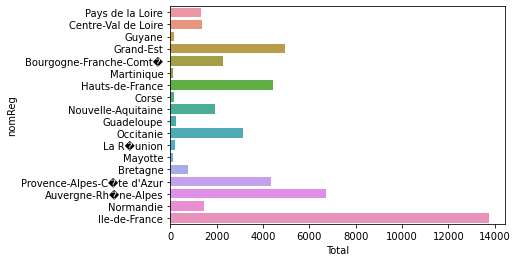

In [8]:
test_df = df_with_total.toPandas()
sns.barplot(x="Total", y="nomReg", data=test_df)

## Progression d'admission au Réa pour chaque region du Covid19

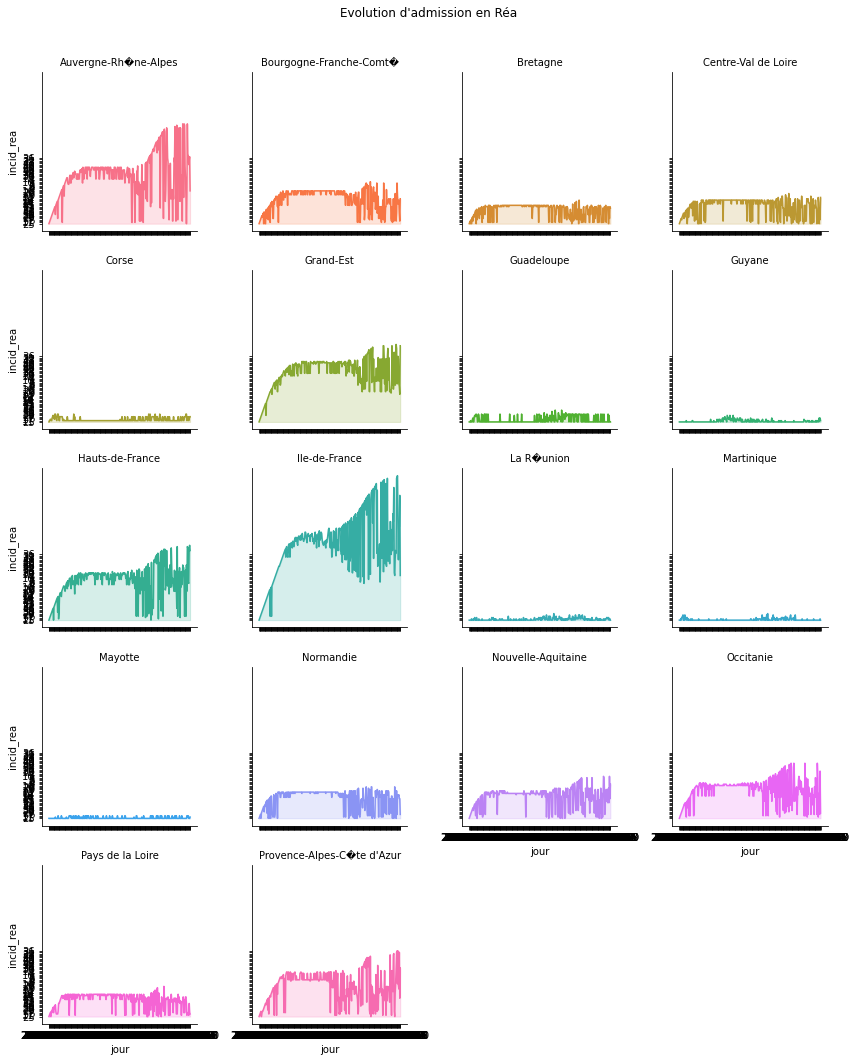

In [10]:
g = sns.FacetGrid(df.toPandas(), col='nomReg', hue='nomReg', col_wrap=4, )
 
g = g.map(plt.plot, 'jour', 'incid_rea')

g = g.map(plt.fill_between, 'jour', 'incid_rea', alpha=0.2).set_titles("{col_name} nomReg")

g = g.set_titles("{col_name}")
 
# Add a title for the whole plo
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle("Evolution d'admission en Réa")

In [11]:
result = (df.groupBy(F.date_format('jour', 'yyyy_MM').alias('month'), 'nomReg')
            .agg(F.avg('incid_rea').alias('mean'))
         )
result.show()

+-------+--------------------+-------------------+
|  month|              nomReg|               mean|
+-------+--------------------+-------------------+
|2020_05|            Bretagne|  0.967741935483871|
|2020_09|            Bretagne| 1.3333333333333333|
|2020_09| Centre-Val de Loire|                1.4|
|2020_08|           Grand-Est| 0.7419354838709677|
|2020_05|          La R�union|0.45161290322580644|
|2020_08|Bourgogne-Franche...|0.16129032258064516|
|2020_09|             Mayotte|0.16666666666666666|
|2020_07|  Nouvelle-Aquitaine| 0.3548387096774194|
|2020_11|     Hauts-de-France| 35.666666666666664|
|2021_01|          Guadeloupe|               0.25|
|2020_04|           Occitanie| 12.133333333333333|
|2020_06|  Nouvelle-Aquitaine|0.23333333333333334|
|2020_07|              Guyane|  2.064516129032258|
|2020_07|          Martinique|                0.0|
|2020_08|            Bretagne| 0.6129032258064516|
|2020_10|          La R�union|                1.0|
|2020_08|          La R�union| 

<AxesSubplot:xlabel='month', ylabel='mean'>

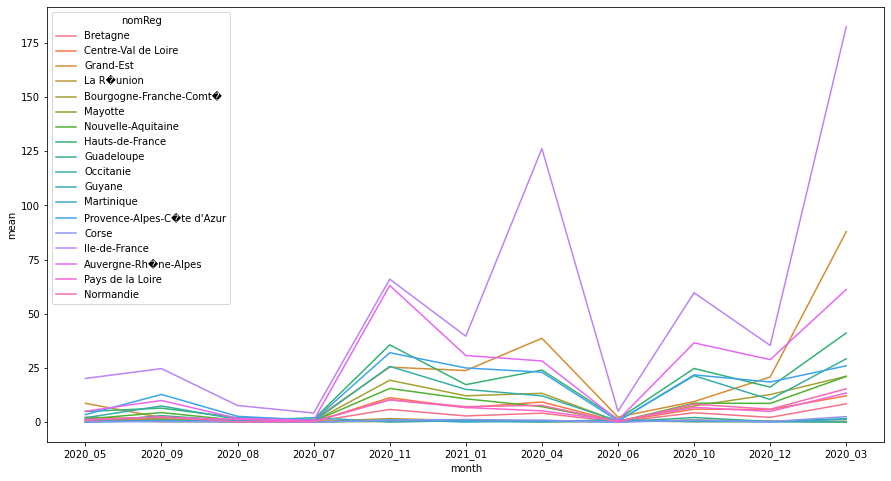

In [12]:
result.toPandas().reset_index()
result
plt.figure(figsize=(15,8))
sns.lineplot(data=result.toPandas(), x="month", y="mean", hue="nomReg")